# 0. Setting

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

dacon 코드 공유에 parquet으로 변환해서 용량 줄이는 코드 올라와 있음.

In [ ]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [ ]:
csv_to_parquet('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/open/train.csv', 'train')
csv_to_parquet('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/open/test.csv', 'test')

In [41]:
train = pd.read_parquet('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/train.parquet')
test = pd.read_parquet('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/test.parquet')

# 1. Data Preprocessing

In [ ]:
train.head()

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701217 entries, 0 to 4701216
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   day_of_week            object 
 1   base_hour              int64  
 2   lane_count             int64  
 3   road_rating            int64  
 4   road_name              object 
 5   multi_linked           int64  
 6   connect_code           int64  
 7   maximum_speed_limit    float64
 8   weight_restricted      float64
 9   road_type              int64  
 10  start_node_name        object 
 11  start_latitude         float64
 12  start_longitude        float64
 13  start_turn_restricted  object 
 14  end_node_name          object 
 15  end_latitude           float64
 16  end_longitude          float64
 17  end_turn_restricted    object 
 18  target                 float64
 19  year                   int64  
 20  month                  int64  
 21  day                    int64  
 22  tourist           

불필요변수제거

In [42]:
train.drop(['vehicle_restricted', 'id', 'height_restricted'], axis = 1, inplace = True)

>> 파생변수 생성

날짜

In [43]:
# 날짜
# 연/일/월 파생변수 생성
train["base_date"] = pd.to_datetime(train["base_date"],format='%Y%m%d')
train['year']= train['base_date'].dt.year     # 데이터를 2021, 2022 구분
train['month']= train['base_date'].dt.month   # 데이터를 월별로 구분(4, 8월 데이터 없음)
train['day']= train['base_date'].dt.day       # 데이터를 일자(31일)별로 구분

In [44]:
# 파생변수 생성 후 base_date 변수 불필요 > 제거
train.drop(['base_date'], axis = 1, inplace = True)

관광객 수

In [45]:
# 관광객 입도 현황(외부 데이터 추가)
tourist = pd.read_csv('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/tourist.csv')
tourist

,year,month,tourist
0,2021.0,1.0,"468,016"
1,2021.0,2.0,"793,768"
2,2021.0,3.0,"893,326"
3,2021.0,4.0,"1,082,861"
4,2021.0,5.0,"1,136,452"
5,2021.0,6.0,"1,138,867"
6,2021.0,7.0,"1,131,512"
7,2021.0,8.0,"974,194"
8,2021.0,9.0,"872,396"
9,2021.0,10.0,"1,222,094"


In [46]:
# 위 tourist df를 train df와 합쳐줌
train = train.merge(tourist[['year', 'month', 'tourist']], how='left', on=['year', 'month'])
train

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,...,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,tourist
0,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,...,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,"1,283,470"
1,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,...,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,"1,263,332"
2,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,...,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,"1,222,094"
3,금,13,2,107,태평로,0,0,50.0,0.0,0,...,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,"873,086"
4,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,...,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,"1,222,094"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,16,1,107,-,0,0,50.0,0.0,0,...,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,"1,204,344"
4701213,목,2,2,107,-,0,0,80.0,43200.0,3,...,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,"873,086"
4701214,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,...,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,"1,283,470"
4701215,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,...,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,"1,222,094"


공휴일

In [62]:
# 공휴일 파생변수(외부 데이터)
holiday = pd.read_csv('C:/Users/강민채/Desktop/KUBIG/ML/쿠빅 컨테스트/holiday.csv')
holiday.head()

,year,month,day,is_holiday
0,2021,1,1,1
1,2021,2,11,1
2,2021,2,12,1
3,2021,2,13,1
4,2021,3,1,1


In [70]:
# holiday df와 train df 합쳐주기
train = train.merge(holiday[['year', 'month', 'day','is_holiday']], how='left', on=['year', 'month','day'])
train['is_holiday']=train['is_holiday'].fillna(0)
train

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,...,end_longitude,end_turn_restricted,target,year,month,day,tourist,is_holiday_x,is_holiday_y,is_holiday
0,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,...,126.662335,없음,52.0,2022,6,23,"1,283,470",NaN,NaN,0.0
1,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,...,126.526240,없음,30.0,2022,7,28,"1,263,332",NaN,NaN,0.0
2,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,...,126.362147,없음,61.0,2021,10,10,"1,222,094",NaN,NaN,0.0
3,금,13,2,107,태평로,0,0,50.0,0.0,0,...,126.566228,없음,20.0,2022,3,11,"873,086",NaN,NaN,0.0
4,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,...,126.330152,없음,38.0,2021,10,5,"1,222,094",NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,16,1,107,-,0,0,50.0,0.0,0,...,126.273750,없음,20.0,2021,11,4,"1,204,344",NaN,NaN,0.0
4701213,목,2,2,107,-,0,0,80.0,43200.0,3,...,126.424890,없음,65.0,2022,3,31,"873,086",NaN,NaN,0.0
4701214,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,...,126.912948,없음,30.0,2022,6,13,"1,283,470",NaN,NaN,0.0
4701215,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,...,126.433332,없음,73.0,2021,10,20,"1,222,094",NaN,NaN,0.0


주말

In [73]:
# 주말 여부
def create_time_features(data):

    tmp = data.copy()

    tmp['weekend'] = tmp['day_of_week'].map({"월":0, "화":0, "수":0, "목":0, "금":0, "토":1, "일":1})

    tmp['holiday_or_not'] = (tmp['weekend'] + tmp['is_holiday']).map({0:0, 1:1, 2:1})
    tmp = tmp.drop(['weekend', 'is_holiday'], axis=1)

    return tmp

train = create_time_features(train)

In [74]:
train

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,...,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,tourist,holiday_or_not
0,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,...,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,"1,283,470",0
1,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,...,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,"1,263,332",0
2,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,...,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,"1,222,094",1
3,금,13,2,107,태평로,0,0,50.0,0.0,0,...,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,"873,086",0
4,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,...,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,"1,222,094",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,목,16,1,107,-,0,0,50.0,0.0,0,...,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,"1,204,344",0
4701213,목,2,2,107,-,0,0,80.0,43200.0,3,...,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,"873,086",0
4701214,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,...,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,"1,283,470",0
4701215,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,...,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,"1,222,094",0


공휴일 + 주말 합쳐서 공휴일여부 변수 만들었음.

In [ ]:
# 관광지 여부 > 논의 필요

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


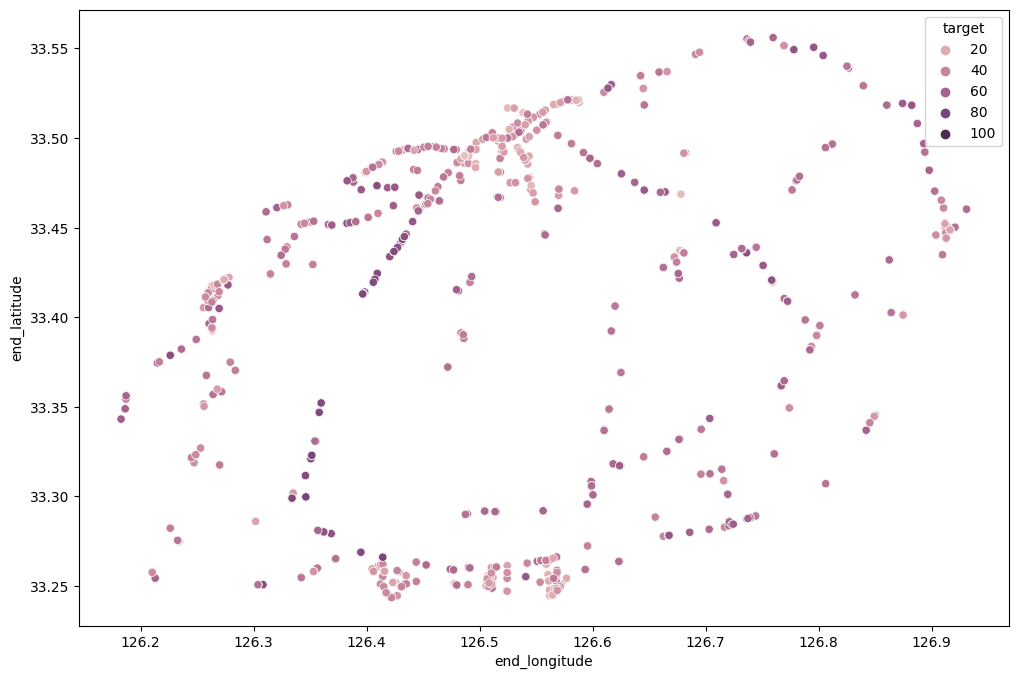

In [83]:
# 해안도로 여부  > 논의 필요
plot_dims=(12,8)
plt.figure(figsize=plot_dims)
sns.scatterplot(train.end_longitude, train.end_latitude, hue=train.target)
plt.ioff()

In [ ]:
# 해안도로 여부: 위도/경도 나눠서 작업.
# 중심지 위도/경도 기준으로 >> 위도상 가장 멀리 떨어져 있는 지점, 경도상 가장 멀리 떨어져 있는 지점?

In [ ]:
# road_name 변수: '리조트' 등의 명칭이 포함되어 있어서 관광지 변수 만들 때 도움될 것 같다는 의견 있었음.
# 관광지 변수 생성 시 필요하면 놔두고, 아니면 그냥 제거

# road_type 변수: 하중 제한 변수와 매우 높은 상관관계 보임. road_type 변수 제거

# road_rating 변수는 사용.

In [ ]:
# 중복데이터
# target 까지 완전히 같은 데이터 > 삭제
# target 빼고 다른 경우: 01시--분 이렇게 분 차이에 따라 달라진 경우이기 때문에 '시간' 단위로 평균/최빈값 > 2개 다 시도해 보고 성능 좋은 걸로 고르기.